<a href="https://www.kaggle.com/code/chinmaygonjari/black-friday-chinmay-gonjari?scriptVersionId=180212891" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


***About Dataset***

**Dataset History**

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products


**DATA PREPROCESSING**

* Check basic statistics of dataset

* Check for missing values in the data

* Check for unique values in data

* Perform EDA

* Purchase Distribution

* Check for outliers

* Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group, etc

* Drop unnecessary fields

* Convert categorical data into integer using map function (e.g 'Gender' column)

* Missing value treatment

* Rename columns

* Fill nan values

* Map range variables into integers (e.g 'Age' column)


**Data Visualisation**

* Visualize individul column

* Age vs Purchased

* Occupation vs Purchased

* Product_category_1 vs Purchased

* Product_category_2 vs Purchased

* Product_category_3 vs Purchased

* City category pie chart

* Check for more possible plots

Rading the dataset

In [2]:
black_fri_df = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
black_fri_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
black_fri_df.shape

(550068, 12)

In [4]:
black_fri_df.index

RangeIndex(start=0, stop=550068, step=1)

In [5]:
black_fri_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
black_fri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
# Creating the copy of main dataset
black_friday = black_fri_df.copy()

In [8]:
black_fri_df.duplicated().sum()

0

# Data Preprocessing

**Dropping the unnecessary columns**

In [9]:
black_friday.drop(['User_ID'], axis = 1, inplace = True)
black_friday.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


**Checking the missing values**

In [11]:
black_friday.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
black_friday.isnull().sum().sum()

556885

*Renaming the Columns for better understanding*

In [13]:
black_friday.rename(columns = {'Age':'Age_Group', 'Occupation':'Occupation_Category', 'Stay_In_Current_City_Years':'Current_Stay', 'Purchase':'Purchase_Amount'}, inplace = True)
black_friday.head()

,Product_ID,Gender,Age_Group,Occupation_Category,City_Category,Current_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [14]:
black_friday.describe()

,Occupation_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [15]:
black_friday.tail()

,Product_ID,Gender,Age_Group,Occupation_Category,City_Category,Current_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
550063,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [16]:
black_friday['Product_ID'].value_counts(ascending = False)

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [17]:
black_friday['Product_ID'].isnull().sum()

0

**Checking the unique values**

In [18]:
a = black_friday.apply(lambda x : x.unique(), axis = 0)
a

Product_ID             [P00069042, P00248942, P00087842, P00085442, P...
Gender                                                            [F, M]
Age_Group                 [0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]
Occupation_Category    [10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11,...
City_Category                                                  [A, C, B]
Current_Stay                                            [2, 4+, 3, 1, 0]
Marital_Status                                                    [0, 1]
Product_Category_1     [3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 1...
Product_Category_2     [nan, 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5...
Product_Category_3     [nan, 14.0, 17.0, 5.0, 4.0, 16.0, 15.0, 8.0, 9...
Purchase_Amount        [8370, 15200, 1422, 1057, 7969, 15227, 19215, ...
dtype: object

**Cheking the value counts**

In [19]:
black_friday['Product_ID'].value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [20]:
black_friday['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

**Now let's do the value counts for all rows combined:**

By defining a function

In [21]:
black_friday['Occupation_Category'].nunique()

21

In [22]:
def value_counts(df_ac):
    
    for i in df_ac.columns:
        print(f'{i} \n{df_ac[i].value_counts()} \n')

value_counts(black_friday)

Product_ID 
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64 

Gender 
Gender
M    414259
F    135809
Name: count, dtype: int64 

Age_Group 
Age_Group
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64 

Occupation_Category 
Occupation_Category
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64 

City_Category 
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64 

Current_Stay 
Current_Stay
1     193821
2     101838
3      95285
4+     84726
0      74398
Nam

**Filling the null values in Product_Category_2 column**

by grouping it with the following columns = Gender, Age_Group, Occupation_Category & Marital Status with Product_Category_2 column

In [23]:
black_friday.head()

,Product_ID,Gender,Age_Group,Occupation_Category,City_Category,Current_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [24]:
black_friday['Product_Category_2'][0]

nan

In [25]:
black_friday.dtypes

Product_ID              object
Gender                  object
Age_Group               object
Occupation_Category      int64
City_Category           object
Current_Stay            object
Marital_Status           int64
Product_Category_1       int64
Product_Category_2     float64
Product_Category_3     float64
Purchase_Amount          int64
dtype: object

In [26]:
black_friday.dtypes

Product_ID              object
Gender                  object
Age_Group               object
Occupation_Category      int64
City_Category           object
Current_Stay            object
Marital_Status           int64
Product_Category_1       int64
Product_Category_2     float64
Product_Category_3     float64
Purchase_Amount          int64
dtype: object

In [27]:
# Grouped 'Gender','Age_Group','Occupation_Category','Marital_Status' & Product_Category_2 by mode(of Product_Category_2) for filling null values in Product_Category_2

prod_cat2_group = black_friday.loc[black_friday['Product_Category_2'].notna()].groupby(['Gender','Age_Group',
        'Occupation_Category','Marital_Status']).agg({'Product_Category_2':(lambda x: pd.Series.mode(x)[0])})
cat2_group = prod_cat2_group.reset_index()
cat2_group
# prod_cat2_group

,Gender,Age_Group,Occupation_Category,Marital_Status,Product_Category_2
0,F,0-17,0,0,14.0
1,F,0-17,1,0,14.0
2,F,0-17,2,0,14.0
3,F,0-17,7,0,14.0
4,F,0-17,10,0,4.0
...,...,...,...,...,...
422,M,55+,17,1,8.0
423,M,55+,18,1,16.0
424,M,55+,19,1,14.0
425,M,55+,20,0,8.0


In [28]:
def fill_cat2_group(x):
    
    return cat2_group.loc[(x[0]==cat2_group['Gender']) & 
                          (x[1]==cat2_group['Age_Group']) & 
                          (x[2]==cat2_group['Occupation_Category']) &
                          (x[3]==cat2_group['Marital_Status']),'Product_Category_2'].values

# Filling null value

black_friday.loc[black_friday['Product_Category_2'].isna(),'Product_Category_2']=black_friday[black_friday['Product_Category_2'].isna()].loc[:,['Gender', 'Age_Group', 'Occupation_Category', 'Marital_Status']].apply(fill_cat2_group,axis=1)

/tmp/ipykernel_18/3459385681.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return cat2_group.loc[(x[0]==cat2_group['Gender']) &
/tmp/ipykernel_18/3459385681.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (x[1]==cat2_group['Age_Group']) &
/tmp/ipykernel_18/3459385681.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (x[2]==cat2_group['Occupation_Category']) &
/tmp/ipykernel_18/3459385681.py:6: FutureWarning: Series.__get

In [29]:
black_friday['Product_Category_2']=black_friday['Product_Category_2'].astype('int8')

In [30]:
black_friday['Product_Category_2'].head()

0     4
1     6
2     4
3    14
4     8
Name: Product_Category_2, dtype: int8

In [31]:
black_friday['Product_Category_2'].isnull().sum()

0

**Filling the null values in Product_Category_3 column**

by grouping it with the following columns = Gender, Age_Group, Occupation_Category & Marital Status with Product_Category_3 column

In [32]:
prod_cat3_group = black_friday.loc[black_friday['Product_Category_3'].notna()].groupby(['Gender', 'Age_Group', 'Occupation_Category', 'Marital_Status']).agg({'Product_Category_3': (lambda x: pd.Series.mode(x)[0])})
cat3_group = prod_cat3_group.reset_index()
cat3_group

,Gender,Age_Group,Occupation_Category,Marital_Status,Product_Category_3
0,F,0-17,0,0,14.0
1,F,0-17,1,0,16.0
2,F,0-17,2,0,8.0
3,F,0-17,7,0,16.0
4,F,0-17,10,0,5.0
...,...,...,...,...,...
421,M,55+,17,1,16.0
422,M,55+,18,1,16.0
423,M,55+,19,1,17.0
424,M,55+,20,0,16.0


In [33]:
# defining a function to fill the null values

def fill_cat3_group(x):
    
    return cat3_group.loc[(x[0] == cat3_group['Gender']) &
                          (x[1] == cat3_group['Age_Group']) &
                          (x[2] == cat3_group['Occupation_Category']) &
                          (x[3] == cat3_group['Marital_Status']), 'Product_Category_3'].values

# filling the null values

black_friday.loc[black_friday['Product_Category_3'].isna(), 'Product_Category_3'] = black_friday[black_friday['Product_Category_3'].isna()].loc[:, ['Gender', 'Age_Group', 'Occupation_Category', 'Marital_Status']].apply(fill_cat3_group, axis = 1)

/tmp/ipykernel_18/458411110.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return cat3_group.loc[(x[0] == cat3_group['Gender']) &
/tmp/ipykernel_18/458411110.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (x[1] == cat3_group['Age_Group']) &
/tmp/ipykernel_18/458411110.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (x[2] == cat3_group['Occupation_Category']) &
/tmp/ipykernel_18/458411110.py:8: FutureWarning: Series.__g

In [34]:
black_friday['Product_Category_3'].isnull().sum()

0

In [35]:
black_friday.isna().sum()

Product_ID             0
Gender                 0
Age_Group              0
Occupation_Category    0
City_Category          0
Current_Stay           0
Marital_Status         0
Product_Category_1     0
Product_Category_2     0
Product_Category_3     0
Purchase_Amount        0
dtype: int64

In [36]:
black_friday.loc[black_friday['Product_Category_3'].str.len()==0,'Product_Category_3']=np.nan

In [37]:
black_friday.isna().sum()

Product_ID              0
Gender                  0
Age_Group               0
Occupation_Category     0
City_Category           0
Current_Stay            0
Marital_Status          0
Product_Category_1      0
Product_Category_2      0
Product_Category_3     15
Purchase_Amount         0
dtype: int64

In [38]:
black_friday[black_friday['Product_Category_3'].isna()]

,Product_ID,Gender,Age_Group,Occupation_Category,City_Category,Current_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
28981,P00250642,M,0-17,13,C,1,0,11,8,NaN,4423
28982,P00085342,M,0-17,13,C,1,0,10,13,NaN,18839
68080,P00265042,M,0-17,13,C,1,0,16,8,NaN,12333
106625,P00177342,M,0-17,13,C,1,0,8,8,NaN,9782
145402,P00285842,M,0-17,13,C,1,0,5,8,NaN,7068
145403,P00267542,M,0-17,13,C,1,0,1,16,NaN,15686
145404,P00139542,M,0-17,13,C,1,0,5,8,NaN,7137
223409,P00220442,M,0-17,13,C,1,0,5,14,NaN,8896
301559,P00315442,M,0-17,13,C,1,0,1,8,NaN,11450
379799,P00148742,M,0-17,13,C,1,0,8,17,NaN,6198


**Dropping the null values**

In [39]:
black_friday.dropna(axis = 0, inplace = True)

In [40]:
# Convert obj into int8
black_friday['Product_Category_3']=black_friday.Product_Category_3.astype('int8')

In [41]:
black_friday.dtypes

Product_ID             object
Gender                 object
Age_Group              object
Occupation_Category     int64
City_Category          object
Current_Stay           object
Marital_Status          int64
Product_Category_1      int64
Product_Category_2       int8
Product_Category_3       int8
Purchase_Amount         int64
dtype: object

In [42]:
black_friday['Gender'].head()

0    F
1    F
2    F
3    F
4    M
Name: Gender, dtype: object

**Converting categorical data into integer using map function**

Copying the data first

In [43]:
b_f = black_friday.copy()

In [44]:
b_f['Gender'].head()

0    F
1    F
2    F
3    F
4    M
Name: Gender, dtype: object

Converting Gender data

In [45]:
b_f['Gender'] = b_f['Gender'].map({'M': 0, 'F': 1})

In [46]:
b_f['Gender']

0         1
1         1
2         1
3         1
4         0
         ..
550063    0
550064    1
550065    1
550066    1
550067    1
Name: Gender, Length: 550053, dtype: int64

In [47]:
b_f['Gender'].isnull().sum()

0

In [48]:
b_f.dtypes

Product_ID             object
Gender                  int64
Age_Group              object
Occupation_Category     int64
City_Category          object
Current_Stay           object
Marital_Status          int64
Product_Category_1      int64
Product_Category_2       int8
Product_Category_3       int8
Purchase_Amount         int64
dtype: object

In [49]:
b_f['Age_Group'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

Converting Age data

In [50]:
# b_f['Age_Group']=b_f['Age_Group'].map({'0-17':'1','18-25':'2','26-35':'3','36-45':'4','46-50':'5','51-55':'6','55+':'7'})

In [51]:
# b_f.head()

# OR

In [52]:
b_f['Age_Group']=b_f['Age_Group'].map({'0-17':'Child','18-25':'Teenage','26-35':'Adult','36-45':'Adult','46-50':'Adult','51-55':'Old','55+':'Old'})

In [53]:
b_f.head()

,Product_ID,Gender,Age_Group,Occupation_Category,City_Category,Current_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
0,P00069042,1,Child,10,A,2,0,3,4,5,8370
1,P00248942,1,Child,10,A,2,0,1,6,14,15200
2,P00087842,1,Child,10,A,2,0,12,4,5,1422
3,P00085442,1,Child,10,A,2,0,12,14,5,1057
4,P00285442,0,Old,16,C,4+,0,8,8,17,7969


In [54]:
b_f.duplicated().sum()

161

In [55]:
b_f.drop_duplicates(inplace = True)

In [56]:
b_f.dtypes

Product_ID             object
Gender                  int64
Age_Group              object
Occupation_Category     int64
City_Category          object
Current_Stay           object
Marital_Status          int64
Product_Category_1      int64
Product_Category_2       int8
Product_Category_3       int8
Purchase_Amount         int64
dtype: object

# Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1300x700 with 0 Axes>

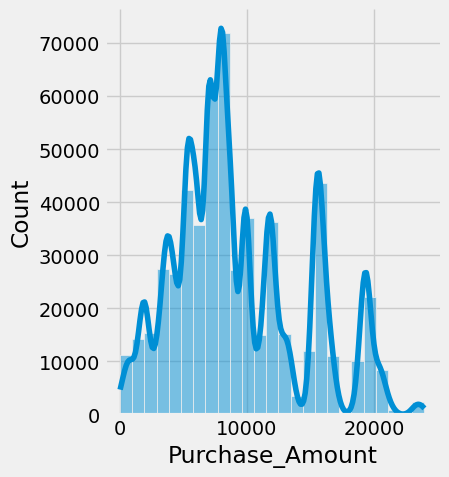

In [57]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (13, 7))
sns.displot(b_f['Purchase_Amount'], bins = 25, kde = True)

<Axes: xlabel='Gender', ylabel='count'>

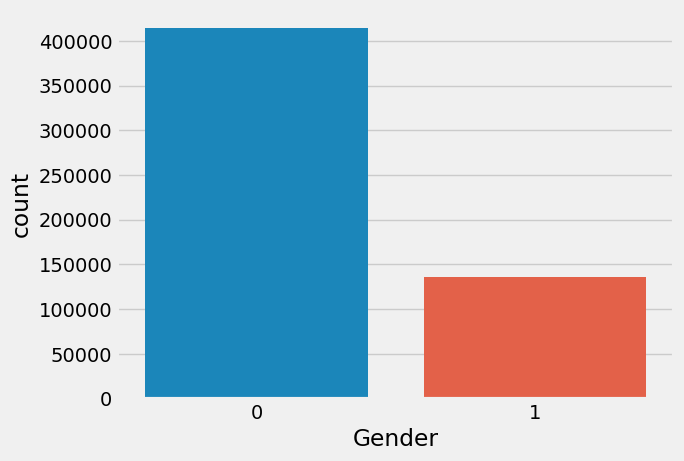

In [58]:
sns.countplot(x = 'Gender', data = b_f)

In [59]:
b_f.head()

,Product_ID,Gender,Age_Group,Occupation_Category,City_Category,Current_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
0,P00069042,1,Child,10,A,2,0,3,4,5,8370
1,P00248942,1,Child,10,A,2,0,1,6,14,15200
2,P00087842,1,Child,10,A,2,0,12,4,5,1422
3,P00085442,1,Child,10,A,2,0,12,14,5,1057
4,P00285442,0,Old,16,C,4+,0,8,8,17,7969


<Axes: xlabel='Age_Group', ylabel='count'>

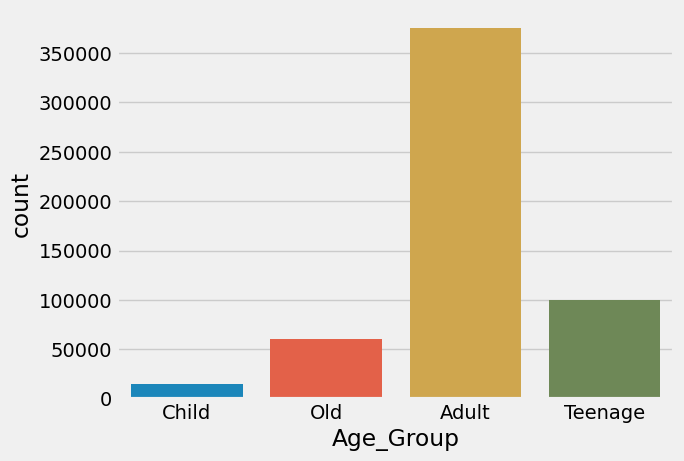

In [60]:
sns.countplot(x='Age_Group',data=b_f)
# b_f['Age_Group'].unique()

<Axes: xlabel='Occupation_Category', ylabel='count'>

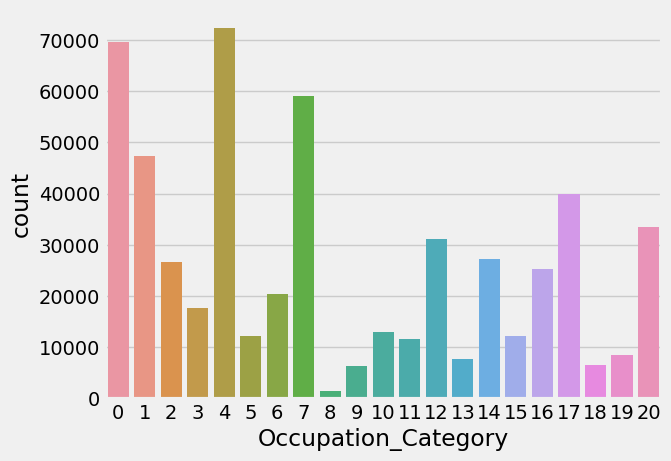

In [61]:
sns.countplot(x= 'Occupation_Category', data = b_f)

<Axes: xlabel='City_Category', ylabel='count'>

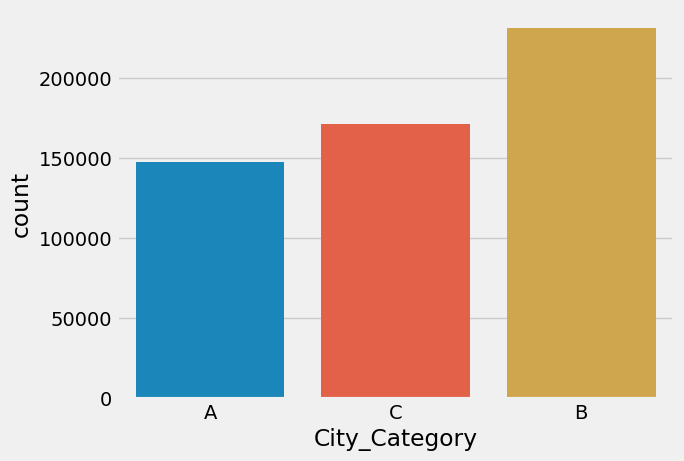

In [62]:
sns.countplot(x= 'City_Category', data = b_f)

<Axes: xlabel='Current_Stay', ylabel='count'>

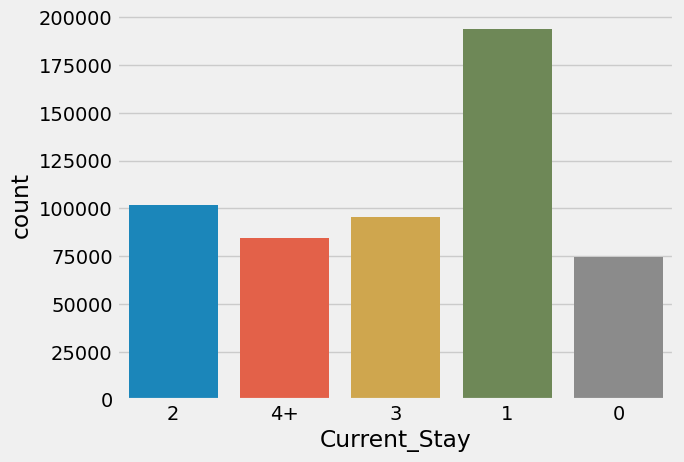

In [63]:
sns.countplot(x= 'Current_Stay', data = b_f)

<Axes: xlabel='Marital_Status', ylabel='count'>

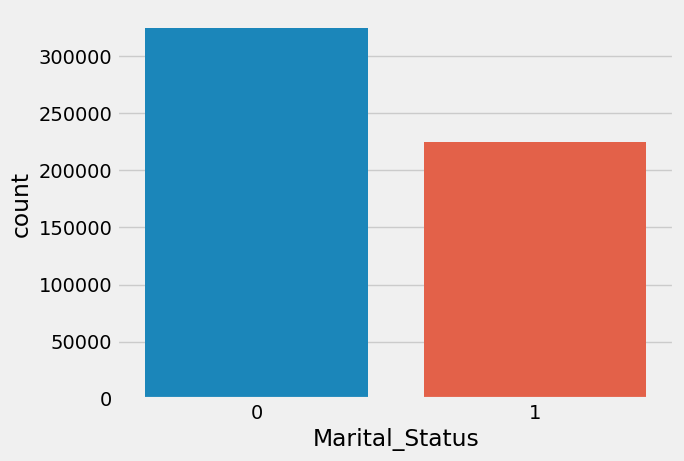

In [64]:
sns.countplot(x= 'Marital_Status', data = b_f)

<Axes: xlabel='Product_Category_1', ylabel='count'>

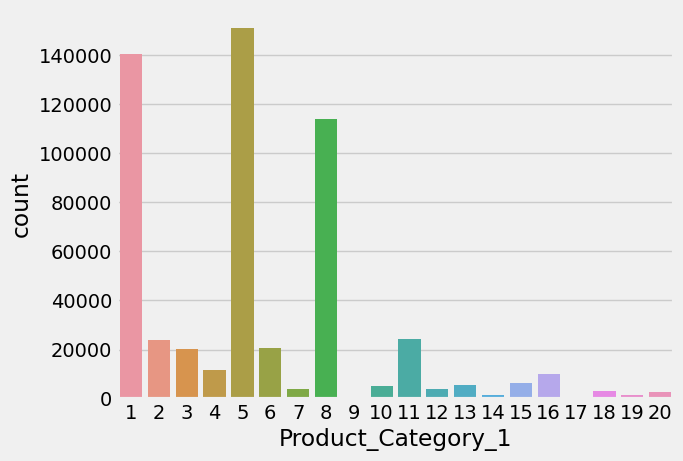

In [65]:
sns.countplot(x= 'Product_Category_1', data = b_f)

<Axes: xlabel='Product_Category_2', ylabel='count'>

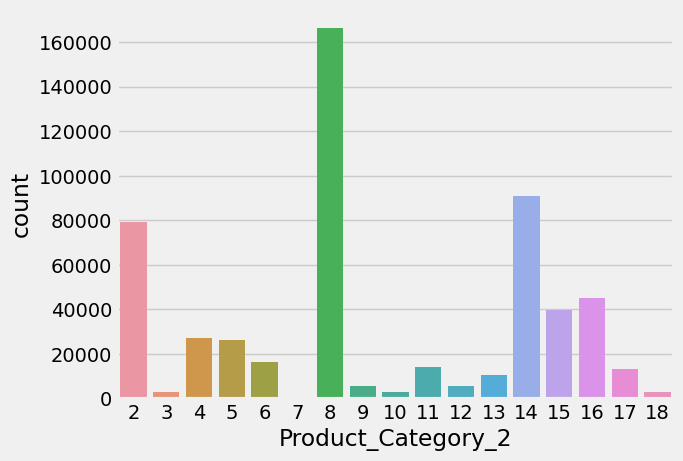

In [66]:
sns.countplot(x= 'Product_Category_2', data = b_f)

<Axes: xlabel='Product_Category_3', ylabel='count'>

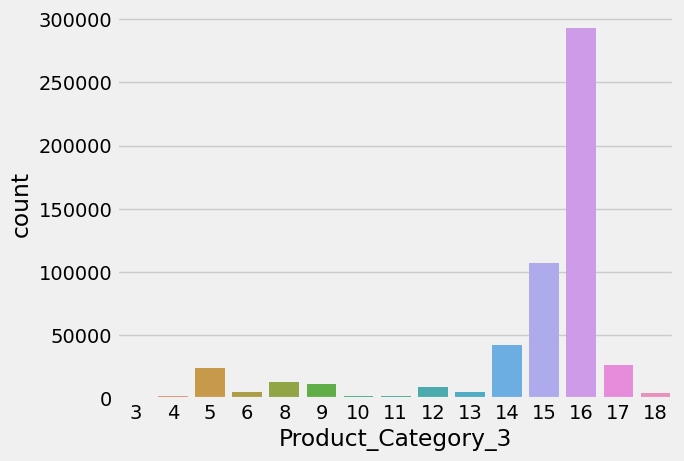

In [67]:
sns.countplot(x= 'Product_Category_3', data = b_f)

# OR

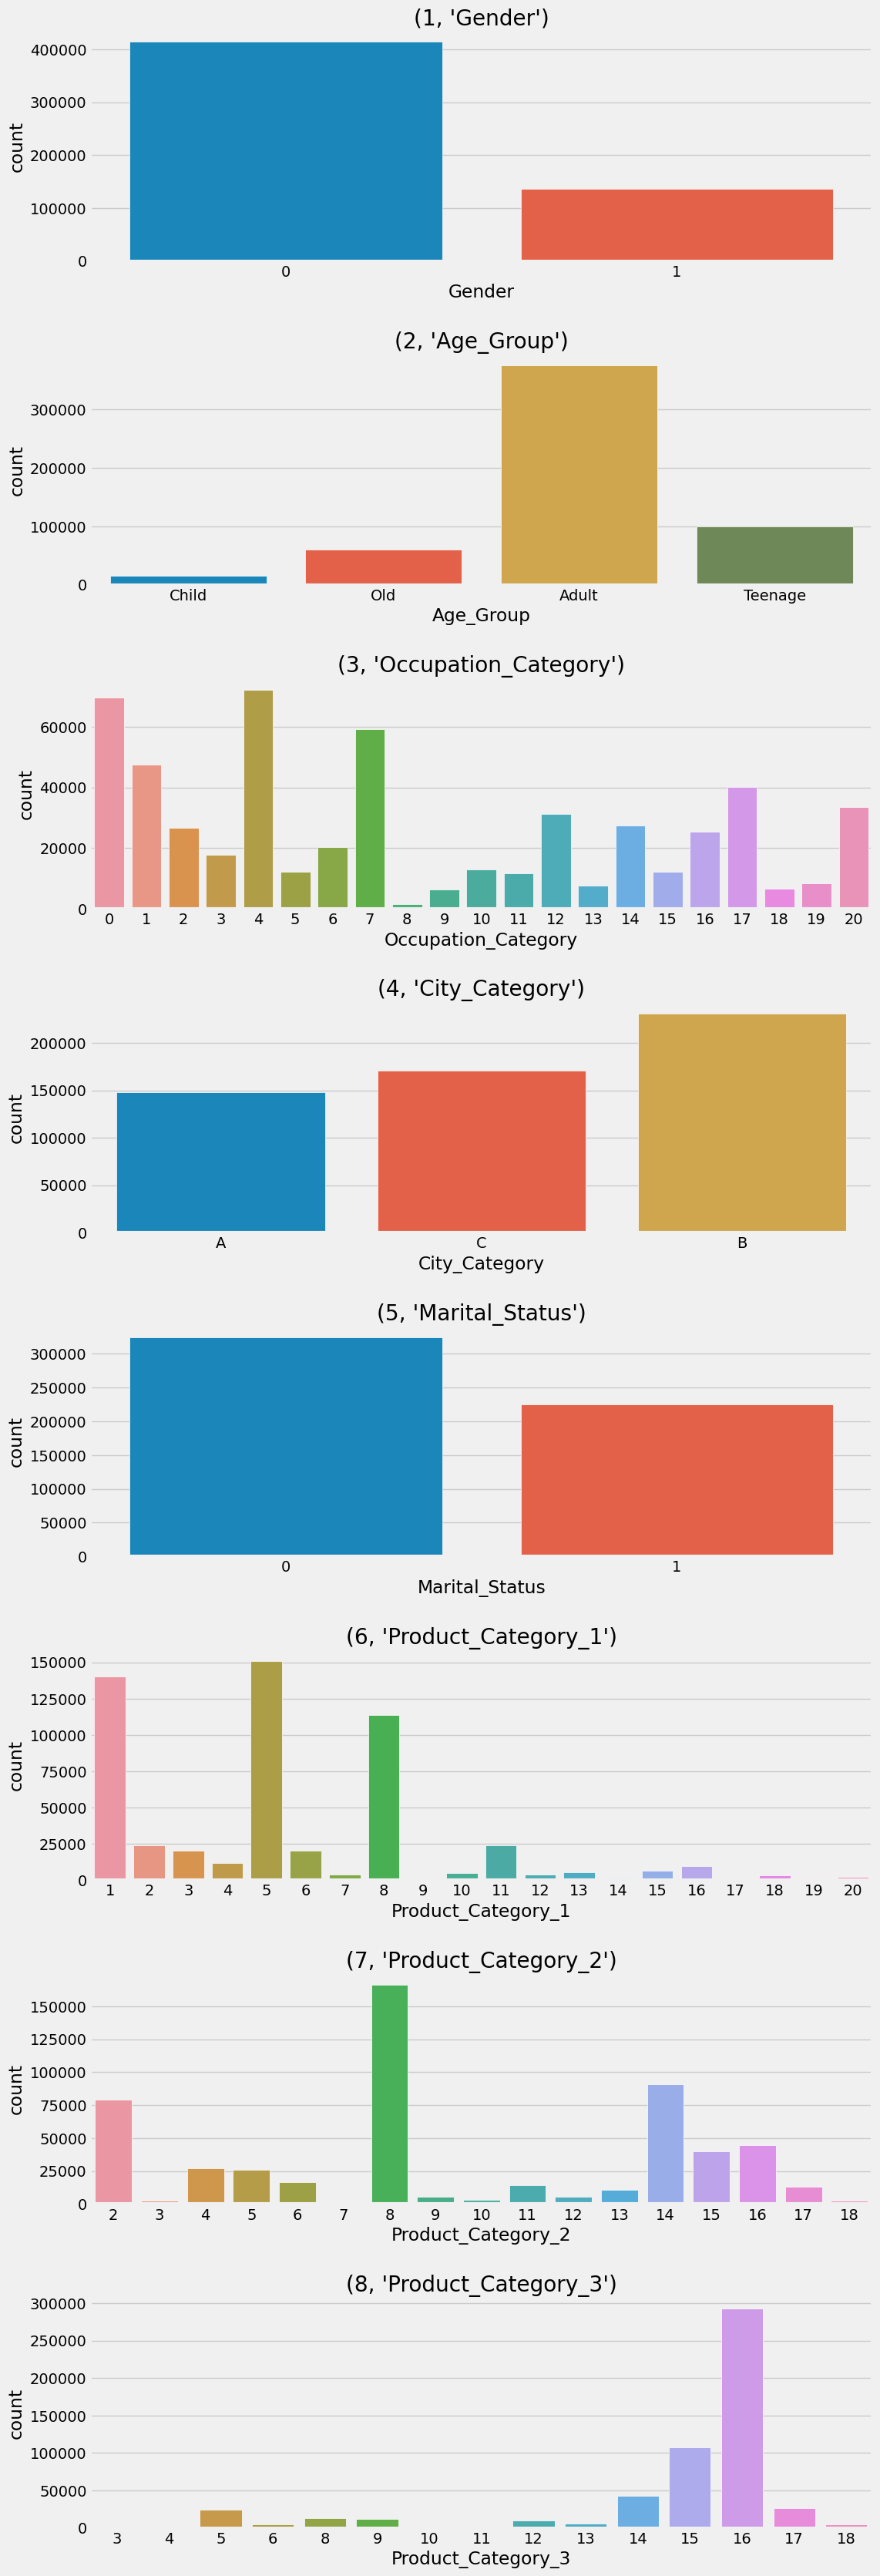

In [68]:
def col_count(Columns):
    
    fig, axes = plt.subplots(nrows=len(Columns) , ncols= 1 , figsize = (12, 34))
    sns.set_style("whitegrid")
    
    for c in enumerate(Columns):
        s = sns.countplot(ax = axes[c[0]], x = b_f[c[1]])
        s.set_title((c[0]+1, c[1]))
        
    plt.tight_layout(pad = 2)

Columns = ['Gender','Age_Group','Occupation_Category','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
col_count(Columns)

In [69]:
b_f.head()

,Product_ID,Gender,Age_Group,Occupation_Category,City_Category,Current_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
0,P00069042,1,Child,10,A,2,0,3,4,5,8370
1,P00248942,1,Child,10,A,2,0,1,6,14,15200
2,P00087842,1,Child,10,A,2,0,12,4,5,1422
3,P00085442,1,Child,10,A,2,0,12,14,5,1057
4,P00285442,0,Old,16,C,4+,0,8,8,17,7969


In [70]:
def purchase_stats(val):
    plt.figure(figsize = (8, 5))
    sns.histplot(data = b_f, x= val, kde = True, bins = 30)
    plt.title('Histogram of {}'.format(val))
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


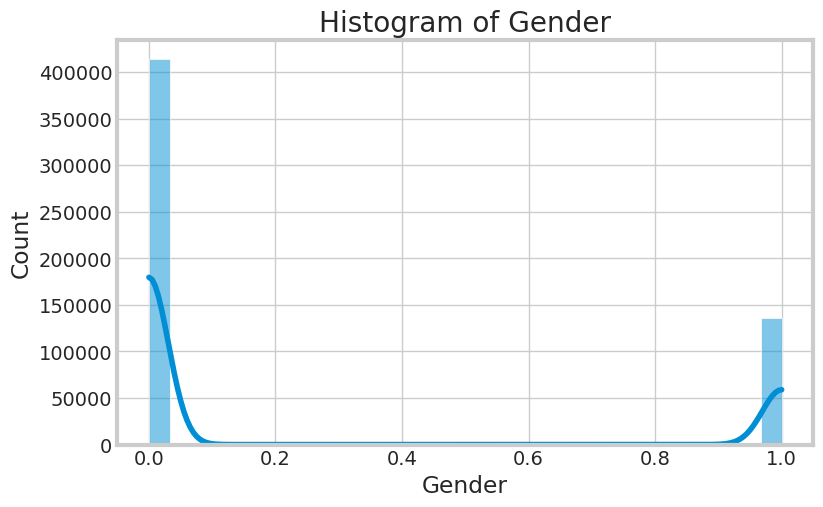

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


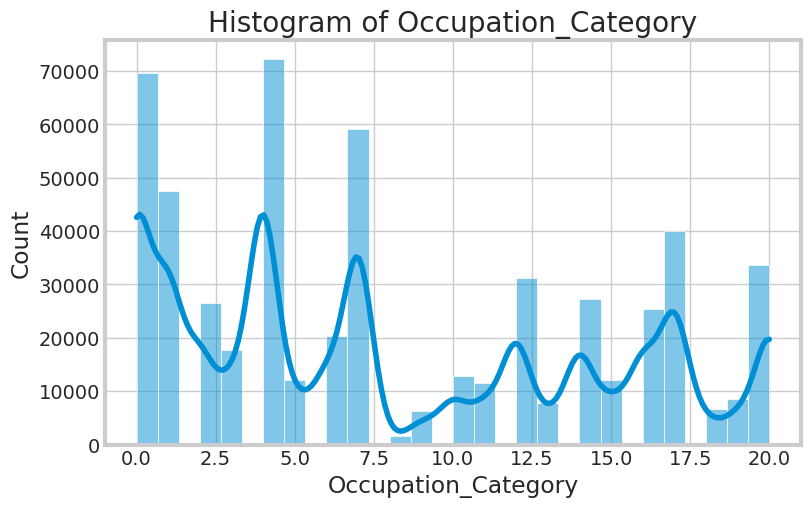

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


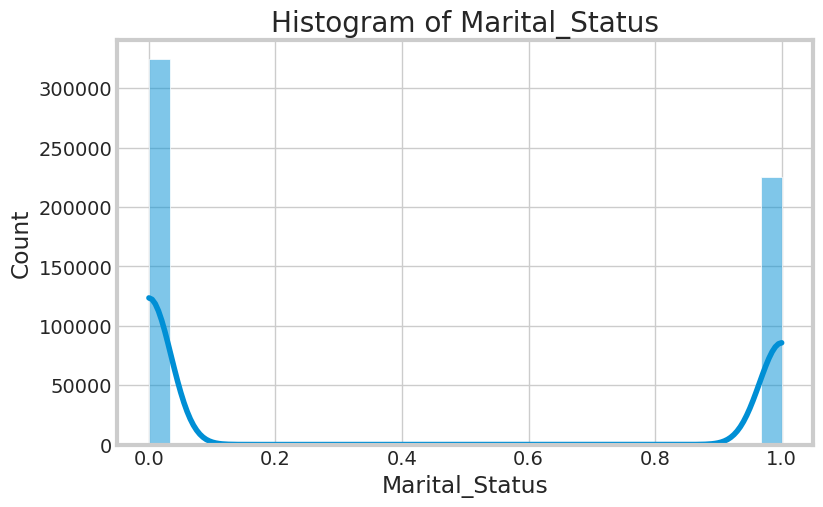

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


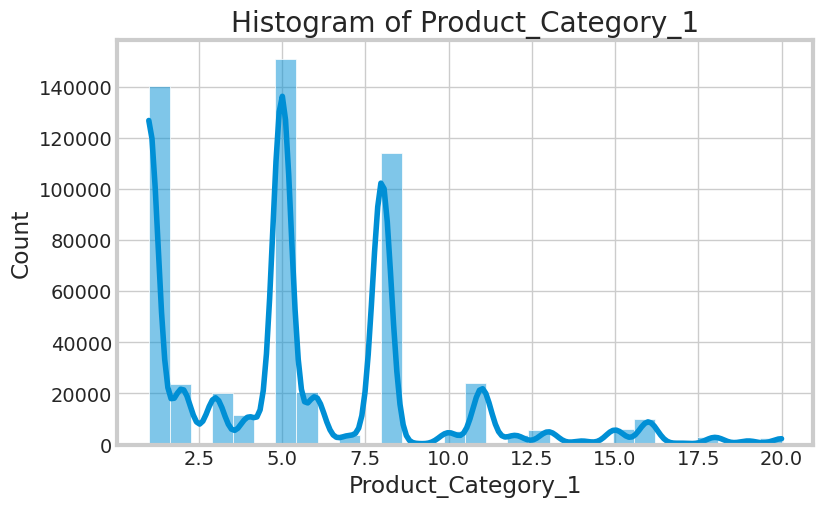

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


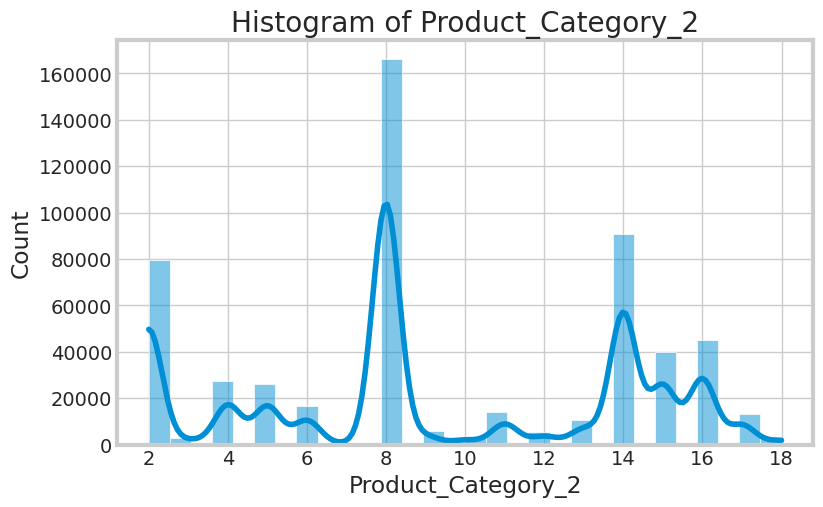

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


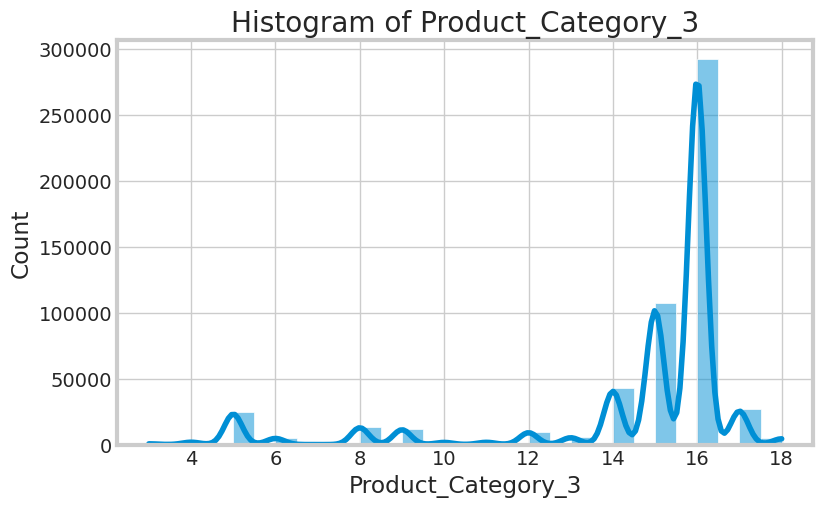

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


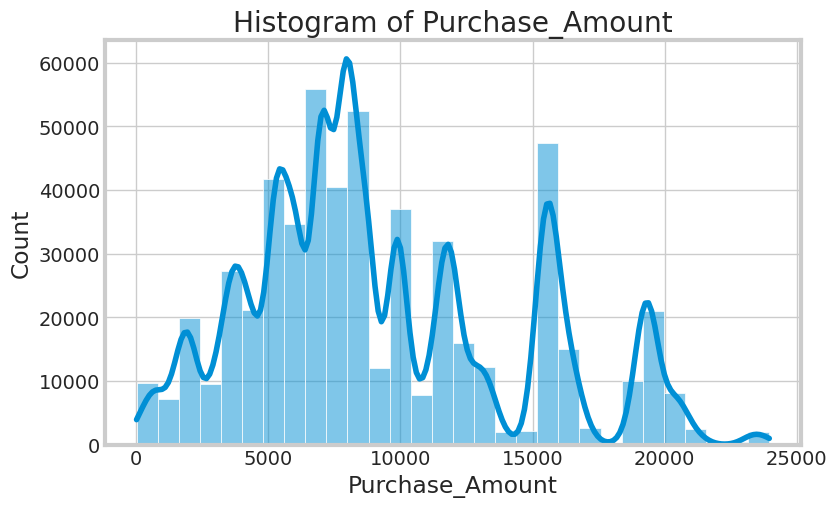

In [71]:
for val in b_f.select_dtypes(exclude = 'object'):
    purchase_stats(val)

In [72]:
b_f.head()

,Product_ID,Gender,Age_Group,Occupation_Category,City_Category,Current_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
0,P00069042,1,Child,10,A,2,0,3,4,5,8370
1,P00248942,1,Child,10,A,2,0,1,6,14,15200
2,P00087842,1,Child,10,A,2,0,12,4,5,1422
3,P00085442,1,Child,10,A,2,0,12,14,5,1057
4,P00285442,0,Old,16,C,4+,0,8,8,17,7969


**Age Vs Purchase**

Text(0.5, 1.0, 'Age Vs Purchase')

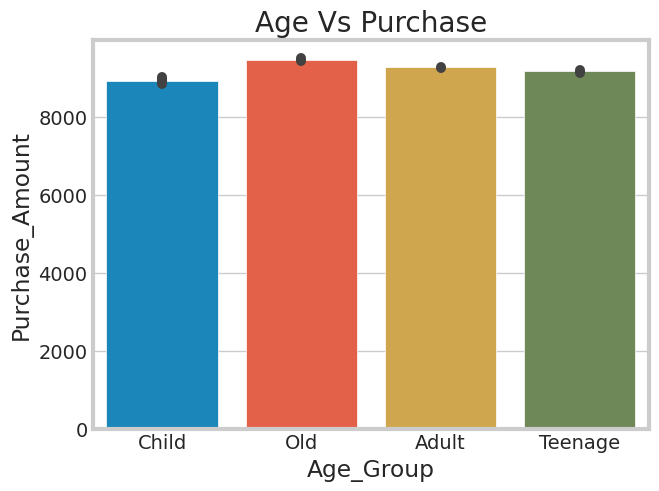

In [73]:
sns.barplot(x = 'Age_Group', y = 'Purchase_Amount', data = b_f)
plt.title('Age Vs Purchase')

**Occupation Vs Purchase**

Text(0.5, 1.0, 'Occupation Vs Purchase')

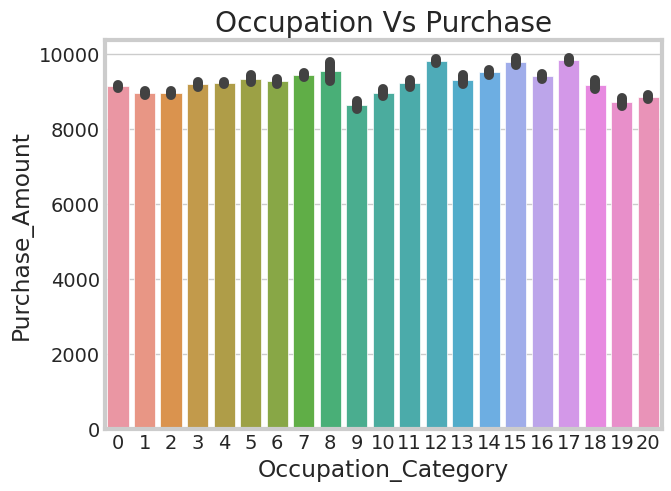

In [74]:
sns.barplot(x = 'Occupation_Category', y = 'Purchase_Amount', data = b_f)
plt.title('Occupation Vs Purchase')

**Product_Category_1 vs Purchased**

Text(0.5, 1.0, 'Product_Category_1 Vs Purchase')

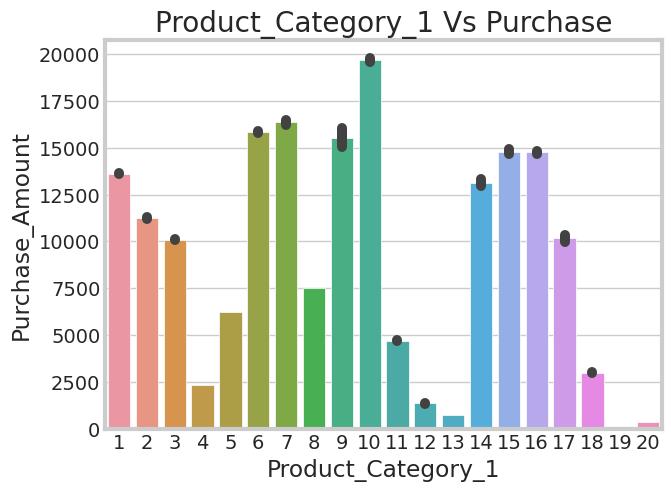

In [75]:
sns.barplot(x = 'Product_Category_1', y = 'Purchase_Amount', data = b_f)
plt.title('Product_Category_1 Vs Purchase')

**Product_Category_2 vs Purchased**

Text(0.5, 1.0, 'Product_Category_2 Vs Purchase')

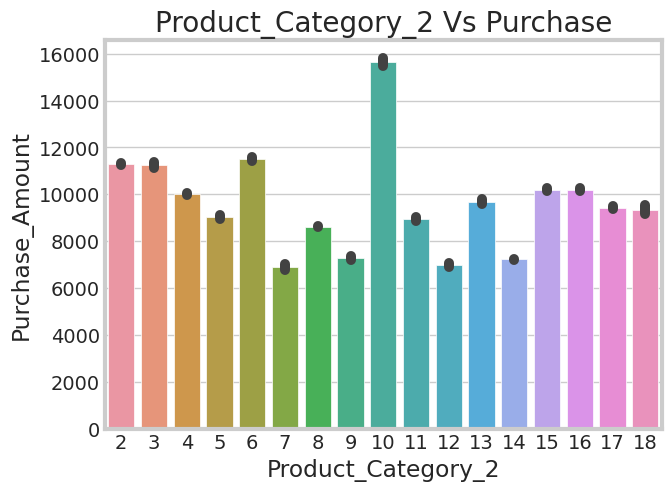

In [76]:
sns.barplot(x = 'Product_Category_2', y = 'Purchase_Amount', data = b_f)
plt.title('Product_Category_2 Vs Purchase')

**Product_Category_3 vs Purchased**

Text(0.5, 1.0, 'Product_Category_3 Vs Purchase')

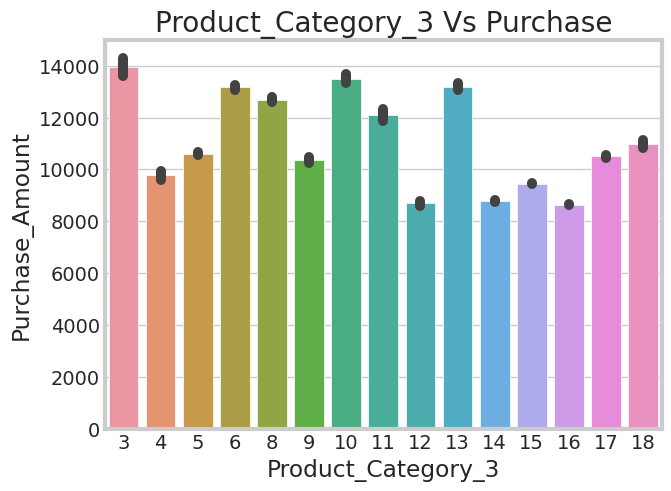

In [77]:
sns.barplot(x = 'Product_Category_3', y = 'Purchase_Amount', data = b_f)
plt.title('Product_Category_3 Vs Purchase')

**City category- Pie chart**

To check pecentage of purchase distribution across the cities

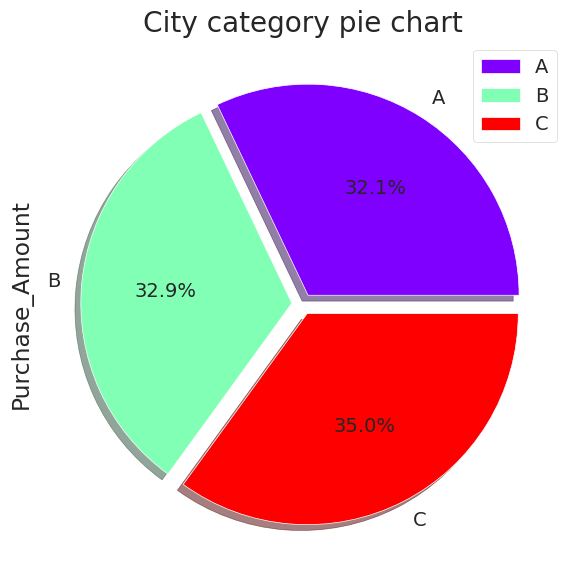

In [78]:
City_cat = b_f.groupby('City_Category').agg({'Purchase_Amount': 'mean'})
City_cat.plot(subplots= True, kind = 'pie', figsize = (6,6), cmap = 'rainbow', shadow = True, autopct = '%.1f%%', explode = (0.05, 0.05, 0.05))
plt.title('City category pie chart')
plt.tight_layout()